## Understanding the Project Scenario

**Problem Statement:**
Salifort Motors is facing a high employee turnover rate, leading to increased costs and decreased productivity. The leadership team seeks to understand the underlying factors contributing to turnover and develop strategies to improve retention.

**Objective:**
To build a predictive model that can accurately predict whether an employee will leave the company based on various factors such as job title, department, number of projects, average monthly hours, and other relevant data points.

**Data:**
* Employee survey data: Likely includes demographic information, job satisfaction, work-life balance, compensation, etc.
* Relevant variables: Consider factors like department, number of projects, average monthly hours, tenure, and potentially others.

**Model Approach:**
* **Statistical Model:** Logistic regression could be a suitable choice due to its ability to handle binary outcomes (leave or stay).
* **Machine Learning Models:** Decision trees, random forests, and XGBoost are potential candidates for their ability to handle complex relationships and potentially improve predictive accuracy.

**Evaluation:**
* Use appropriate metrics such as accuracy, precision, recall, F1-score, and AUC-ROC to assess the model's performance.

**Recommendations:**
* Based on the model's findings, identify key factors driving turnover.
* Propose strategies to address these factors and improve employee retention.

By following these steps, I can effectively address the employee turnover issue at Salifort Motors and contribute to the company's success.


## PACE Strategy Table for the Salifort Motors Project

| Milestone | Task | PACE Stage |
|---|---|---|
| **Data Acquisition and Exploration** | Collect employee survey data | Plan |
| | Clean and preprocess data | Do |
| | Explore data relationships and distributions | Check |
| | Identify relevant variables | Act |
| **Model Development and Selection** | Build logistic regression model | Plan |
| | Build decision tree, random forest, and XGBoost models | Do |
| | Evaluate model performance using appropriate metrics | Check |
| | Select the best-performing model | Act |
| **Model Interpretation and Insights** | Analyze model coefficients or feature importance | Plan |
| | Identify key factors driving turnover | Do |
| | Generate actionable recommendations | Check |
| | Communicate findings to leadership | Act |
| **Model Deployment and Monitoring** | Deploy model into production environment | Plan |
| | Monitor model performance and retrain as needed | Do |
| | Continuously evaluate and refine the model | Check |
| | Provide ongoing insights to leadership | Act |



Step 1. Imports
Import packages
Load dataset## Analyzing the Salifort Motors Employee Data

### Data Understanding

**Dataset:** HR_capstone_dataset.csv

**Rows:** 14,999 (representing individual employees)

**Columns:** 10 (containing various employee attributes)

**Column Descriptions:**

| Column Name | Type | Description |
|---|---|---|
| satisfaction_level | int64 | Self-reported satisfaction level (0-1) |
| last_evaluation | int64 | Score of last performance review (0-1) |
| number_project | int64 | Number of projects contributed to |
| average_monthly_hours | int64 | Average monthly working hours |
| time_spend_company | int64 | Years with the company |
| work_accident | int64 | Whether an accident occurred |
| left | int64 | Whether the employee left the company |
| promotion_last_5years | int64 | Whether promoted in the last 5 years |
| department | str | Employee's department |
| salary | str | Salary level (low, medium, high) |

### Initial Observations

* **Target Variable:** `left` (binary indicating employee attrition)
* **Predictor Variables:** `satisfaction_level`, `last_evaluation`, `number_project`, `average_monthly_hours`, `time_spend_company`, `work_accident`, `promotion_last_5years`, `department`, and `salary`
* **Data Types:** Most variables are numerical (int64), while `department` and `salary` are categorical.

### Potential Relationships and Hypotheses

Based on the data, we can explore the following relationships and hypotheses:

* **Satisfaction and Attrition:** Employees with lower satisfaction levels may be more likely to leave.
* **Performance and Attrition:** Employees with poor performance reviews or excessive workload might be more likely to leave.
* **Tenure and Attrition:** Employees with shorter tenures may be more likely to leave due to lack of commitment or fit.
* **Promotions and Attrition:** Employees who feel undervalued or lack opportunities for growth may be more likely to leave.
* **Work-Life Balance and Attrition:** Employees with excessive working hours or poor work-life balance may be more likely to leave.
* **Department and Attrition:** Certain departments or roles might have higher turnover rates.
* **Salary and Attrition:** Employees who feel underpaid or dissatisfied with their compensation may be more likely to leave.

### Next Steps

1. **Data Cleaning and Preprocessing:**
   * Handle missing values (if any).
   * Check for outliers and inconsistencies.
   * Convert categorical variables (department, salary) to numerical format (e.g., one-hot encoding).

2. **Exploratory Data Analysis (EDA):**
   * Visualize the distribution of variables (histograms, box plots).
   * Calculate summary statistics (mean, median, mode, standard deviation).
   * Explore correlations between variables.

3. **Feature Engineering:**
   * Consider creating new features based on existing variables (e.g., calculate a work-life balance index).

4. **Model Building and Evaluation:**
   * Build and evaluate various models (logistic regression, decision trees, random forests, XGBoost).
   * Use appropriate metrics (accuracy, precision, recall, F1-score, AUC-ROC) to assess model performance.

5. **Interpretation and Recommendations:**
   * Analyze the model's results to identify key factors influencing attrition.
   * Provide actionable recommendations to improve employee retention.



## Step 1. Imports

*   Import packages
*   Load dataset

### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score### Load dataset

### Load dataset

In [2]:
# Load dataset into a dataframe
df0 = pd.read_csv("/kaggle/input/hr-analytics-and-job-prediction/HR_comma_sep.csv")

# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)

In [3]:
print("Dataset Shape:")
df0.shape

Dataset Shape:


(14999, 10)

In [4]:
print("\nData Types:")
df0.dtypes


Data Types:


satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [5]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

In [6]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Rename columns as needed
df0 = df0.rename(columns={'satisfaction_level': 'satisfaction', 'last_evaluation': 'performance_score', 'number_project': 'projects',
       'average_montly_hours': 'average_hours', 'time_spend_company': 'tenure', 'promotion_last_5years': 'promotion', 'Department': 'department'})


# Display all column names after the update
print(df0.columns)

Index(['satisfaction', 'performance_score', 'projects', 'average_hours',
       'tenure', 'Work_accident', 'left', 'promotion', 'department', 'salary'],
      dtype='object')


### Check missing values

In [8]:
# Check for missing values
df0.isnull().sum()

satisfaction         0
performance_score    0
projects             0
average_hours        0
tenure               0
Work_accident        0
left                 0
promotion            0
department           0
salary               0
dtype: int64

### Check duplicates

In [9]:
# Check for duplicates
duplicates = df0.duplicated()
# Count the number of duplicates
num_duplicates = duplicates.sum()
# Print the number of duplicates
print("Number of duplicates:", num_duplicates)

Number of duplicates: 3008


In [10]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction,performance_score,projects,average_hours,tenure,Work_accident,left,promotion,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [11]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df0_no_duplicates = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
print("First few rows of the dataframe without duplicates:")
df0_no_duplicates.head()

First few rows of the dataframe without duplicates:


,satisfaction,performance_score,projects,average_hours,tenure,Work_accident,left,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [12]:
print("Dataset Shape with duplicates:")
df0.shape

Dataset Shape with duplicates:


(14999, 10)

In [13]:
print("Dataset Shape with no duplicates:")
df0_no_duplicates.shape

Dataset Shape with no duplicates:


(11991, 10)

3,008 rows contain duplicates. That is 20% of the data.

### Check outliers

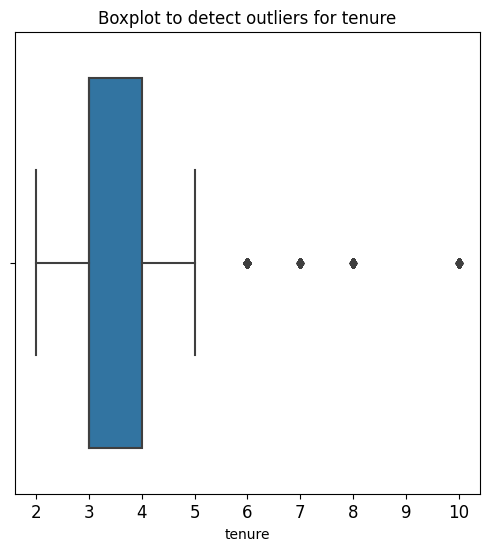

In [14]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x= df0_no_duplicates['tenure'])
plt.show()

In [15]:
# Determine the number of rows containing outliers

# Define a threshold for outliers (e.g., 1.5 times the interquartile range)
iqr = df0_no_duplicates['tenure'].quantile(0.75) - df0_no_duplicates['tenure'].quantile(0.25)
threshold = 1.5 * iqr
lower_bound = df0_no_duplicates['tenure'].quantile(0.25) - threshold
upper_bound = df0_no_duplicates['tenure'].quantile(0.75) + threshold

print("Lower limit:", lower_bound)
print("Upper limit:", upper_bound)

# Identify outliers
outliers = df0_no_duplicates[(df0_no_duplicates['tenure'] < lower_bound) | (df0_no_duplicates['tenure'] > upper_bound)]

# Count the number of outliers
num_outliers = len(outliers)
print("Number of outliers in 'tenure':", num_outliers)


Lower limit: 1.5
Upper limit: 5.5
Number of outliers in 'tenure': 824


# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)

**Relationships between Variables:**

* **Satisfaction Level and Attrition:** Lower satisfaction levels seem to be correlated with higher attrition rates.
* **Performance Evaluation and Attrition:** Employees with lower performance evaluations might be more likely to leave.
* **Number of Projects and Attrition:** A high number of projects could lead to increased stress and burnout, potentially contributing to higher attrition.
* **Average Monthly Hours and Attrition:** Excessive working hours might negatively impact job satisfaction and lead to attrition.
* **Tenure and Attrition:** Employees with shorter tenures might be more likely to leave, especially during the initial period of adjustment.

**Distributions in the Data:**

* **Satisfaction Level:** The distribution might be skewed, with a majority of employees having moderate to high satisfaction levels.
* **Performance Evaluation:** The distribution could be relatively normal, with most employees having average performance ratings.
* **Number of Projects:** The distribution might be skewed, with a few employees handling a large number of projects.
* **Average Monthly Hours:** The distribution might be skewed, with a few employees working significantly more hours than others.
* **Tenure:** The distribution might be skewed, with a higher proportion of employees having shorter tenures.

**Data Transformations:**

* **Categorical Variables:** Convert categorical variables like `department` and `salary` into numerical representations using techniques like one-hot encoding or label encoding.
* **Outliers:** Identify and handle outliers using techniques like capping, flooring, or removal, depending on the nature of the outliers and their impact on the analysis.
* **Feature Scaling:** If necessary, scale numerical features to a common range (e.g., using normalization or standardization) to ensure that all features have a similar impact on the model.

**Reasons for Transformations:**

* **Categorical Variables:** Numerical representations allow machine learning algorithms to process the data effectively.
* **Outliers:** Outliers can significantly impact the model's performance, so it's important to handle them appropriately.
* **Feature Scaling:** Scaling helps to improve the performance of many machine learning algorithms, especially those that use distance-based metrics.

**Purposes of EDA Before Model Construction:**

* **Understand the data:** Gain insights into the data's characteristics, distributions, and relationships between variables.
* **Identify patterns:** Discover patterns and trends that can inform feature engineering and model selection.
* **Detect anomalies:** Identify outliers, missing values, and inconsistencies in the data.
* **Inform feature engineering:** Create new features or transform existing ones to improve model performance.
* **Assess data quality:** Ensure the data is clean and suitable for analysis.

**Resources:**

* **Python libraries:** Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn, XGBoost.
* **Online tutorials and courses:**
    * Coursera: [https://www.coursera.org/](https://www.coursera.org/)
    * Kaggle: [https://www.kaggle.com/](https://www.kaggle.com/)
    * DataCamp: [https://www.datacamp.com/](https://www.datacamp.com/)
* **Statistical textbooks:** Introductory statistics textbooks.

**Ethical Considerations:**

* **Data privacy:** Ensure compliance with data privacy regulations (e.g., GDPR, CCPA).
* **Bias:** Avoid bias in data collection, analysis, and model development.
* **Fairness:** Consider the potential impact of the model on different groups and ensure equitable treatment.
* **Transparency:** Explain the model's decision-making process and limitations.

## Step 2. Data Exploration (Continue EDA)

In [16]:
# Get numbers of people who left vs. stayed
num_left = df0_no_duplicates['left'].sum()
num_stayed = len(df0_no_duplicates) - num_left

# Get percentages of people who left vs. stayed
percentage_left = (num_left / len(df0_no_duplicates)) * 100
percentage_stayed = (num_stayed / len(df0_no_duplicates)) * 100

print(f"Number of employees who left: {num_left}")
print(f"Number of employees who stayed: {num_stayed}")
print(f"Percentage of employees who left: {percentage_left:.2f}%")
print(f"Percentage of employees who stayed: {percentage_stayed:.2f}%")

Number of employees who left: 1991
Number of employees who stayed: 10000
Percentage of employees who left: 16.60%
Percentage of employees who stayed: 83.40%


### Data visualizations

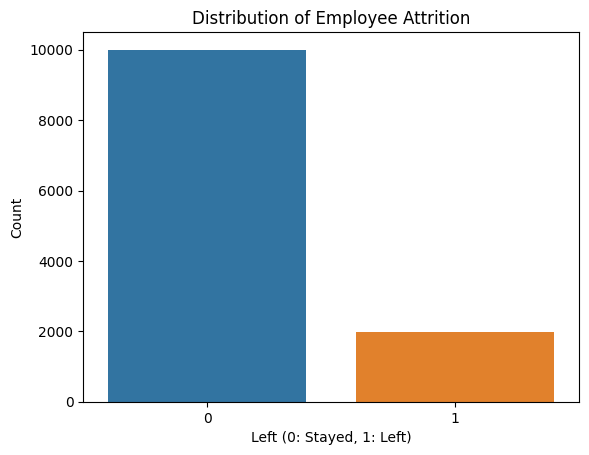

In [17]:
# Visualize the distribution of the target variable 'left'
sns.countplot(x='left', data=df0_no_duplicates)
plt.title('Distribution of Employee Attrition')
plt.xlabel('Left (0: Stayed, 1: Left)')
plt.ylabel('Count')
plt.show()

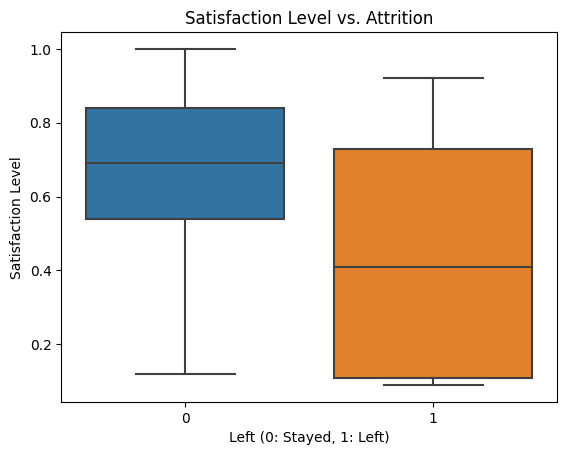

In [18]:
# Visualize the relationship between satisfaction level and attrition
sns.boxplot(x='left', y='satisfaction', data=df0_no_duplicates)
plt.title('Satisfaction Level vs. Attrition')
plt.xlabel('Left (0: Stayed, 1: Left)')
plt.ylabel('Satisfaction Level')
plt.show()

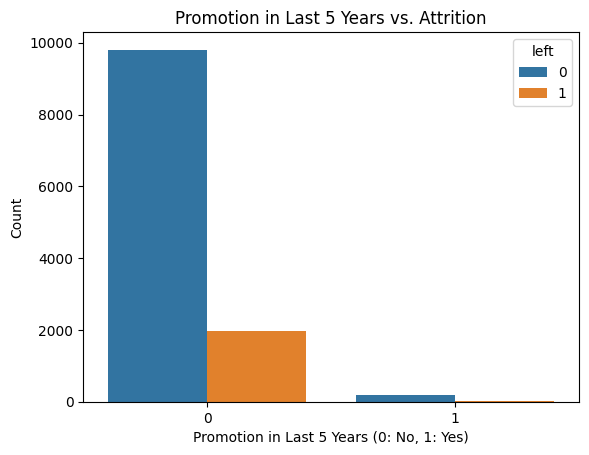

In [19]:
# Visualize the relationship between promotion in the last 5 years and attrition
sns.countplot(x='promotion', hue='left', data=df0_no_duplicates)
plt.title('Promotion in Last 5 Years vs. Attrition')
plt.xlabel('Promotion in Last 5 Years (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

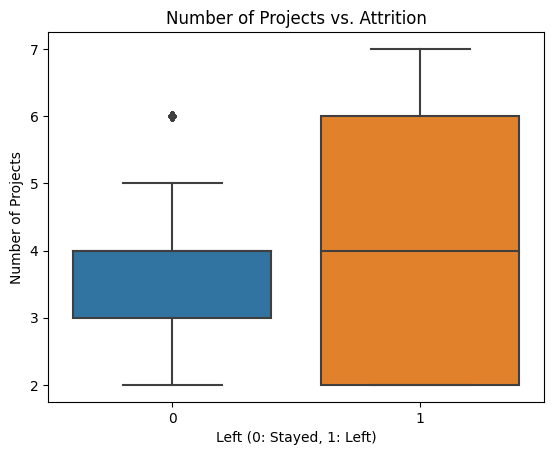

In [20]:
#This plot can help you understand if a higher number of projects is associated with higher attritio
sns.boxplot(x='left', y='projects', data=df0_no_duplicates)
plt.title('Number of Projects vs. Attrition')
plt.xlabel('Left (0: Stayed, 1: Left)')
plt.ylabel('Number of Projects')
plt.show()

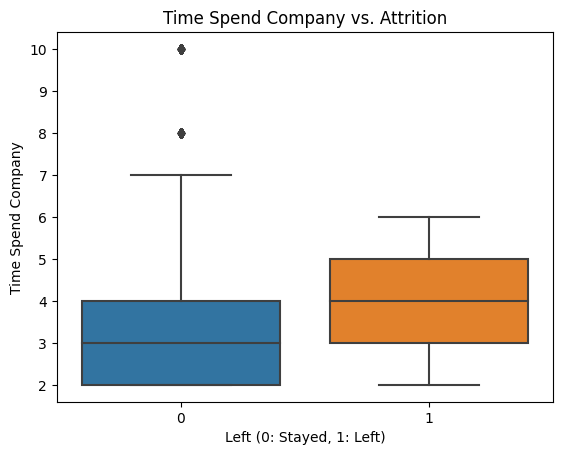

In [21]:
#This plot can help you identify if employees with specific tenures are more likely to leave
sns.boxplot(x='left', y='tenure', data=df0_no_duplicates)
plt.title('Time Spend Company vs. Attrition')
plt.xlabel('Left (0: Stayed, 1: Left)')
plt.ylabel('Time Spend Company')
plt.show()

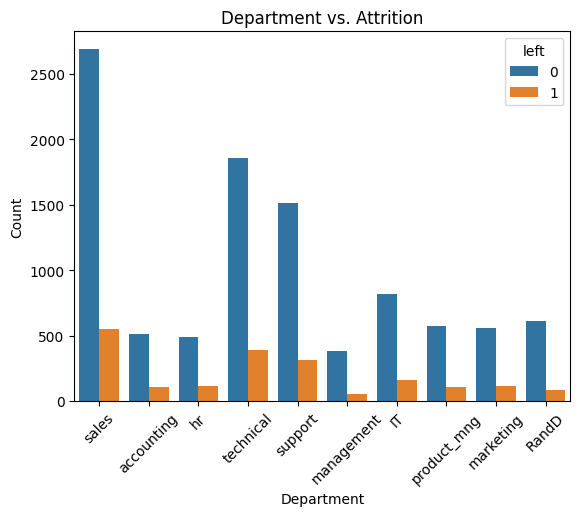

In [22]:
#This plot can help you understand if certain departments have higher attrition rates than others.
sns.countplot(x='department', hue='left', data=df0_no_duplicates)
plt.title('Department vs. Attrition')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

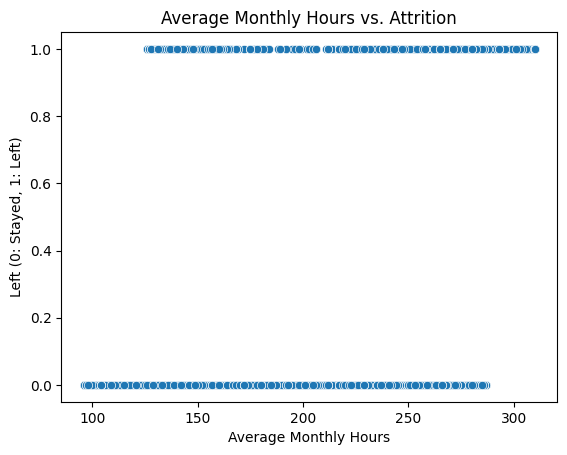

In [23]:
# Visualize the relationship between average monthly hours and attrition
sns.scatterplot(x='average_hours', y='left', data=df0_no_duplicates)
plt.title('Average Monthly Hours vs. Attrition')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Left (0: Stayed, 1: Left)')
plt.show()

### Insights

- Imbalanced Dataset: The dataset is imbalanced, with a significantly higher number of employees who stayed compared to those who left. This imbalance might affect the performance of certain classification models.

- Satisfaction Level: Employees who left tend to have lower satisfaction levels compared to those who stayed. This suggests that job satisfaction is a crucial factor influencing employee retention.

- Number of Projects: Employees with a higher number of projects tend to have a higher attrition rate. This could indicate that excessive workload might contribute to employee burnout and turnover.

- Tenure: Employees with shorter tenures are more likely to leave. This suggests that employee retention strategies should focus on onboarding and early career development.

- Department: Certain departments, such as sales, technical, and support, seem to have higher attrition rates. This might be due to various factors, including workload, stress levels, and job satisfaction

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data